# K-Nearest Neighbors (KNN) Classification for Stroke Prediction


## Introduction to K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a non-parametric, instance-based learning algorithm commonly used for classification and regression tasks. In this project, we utilize KNN to classify patients into either stroke or non-stroke categories based on various health-related features.

KNN operates by finding the 'k' closest data points (neighbors) in the training set and making predictions based on the majority class among those neighbors. It is a simple yet powerful algorithm that relies on proximity to make decisions, making it particularly effective when the data is well-distributed.

In this implementation, KNN is evaluated using different performance metrics, such as accuracy, precision, recall, and F1-score, with an exploration of how the value of 'k' influences the model's performance. Additionally, we compare results using 2-way (train-test) and 3-way (train-validation-test) data splits to understand the algorithm's behavior across different training setups.


## Implementation of K-Nearest Neighbors (KNN)

The implementation of the KNN algorithm for stroke prediction involved several key steps:

### 0: Import necessary libraries

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


### 1: Data Loading and Preprocessing

This section focuses on loading the dataset and preparing it for modeling:

- **Dataset Loading**: The dataset `stroke.csv` is loaded into a DataFrame.
  
- **Handling Missing Values**: Numeric columns that contain missing values are filled with the **median** of the respective column. This approach is suitable for numeric data to prevent bias caused by extreme values.

- **Label Encoding**: Categorical variables (`gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`) are converted into numerical values using the `LabelEncoder`. This transformation is necessary because machine learning algorithms like KNN require numerical input.
  
- **Defining Features and Target**: The feature set `X` includes all columns except the target variable `stroke`, which is stored in `y`.


In [15]:
# Load the dataset
df = pd.read_csv('stroke.csv')

# Fill missing values in numeric columns with the mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Convert categorical columns into numerical values
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Define X (features) and y (target)
X = df.drop(columns=['stroke'])  # Assuming 'stroke' is the target column
y = df['stroke']



### 2: Dataset Splitting

In this section, the dataset is split into training, validation, and test sets using two different strategies:

- **Cell 1: 3-way Split**:
  - The data is split into 60% training, 20% validation, and 20% testing sets using `train_test_split()`. First, 40% of the data is held out temporarily, and then it's split equally into validation and testing sets. 
  - This 3-way split helps to evaluate model performance on both unseen validation data and final test data.

  - The shapes of the resulting sets are printed for verification.

- **Cell 2: 2-way Split**:
  - A simpler 80% training and 20% testing split is applied in this case using `train_test_split()`.
  - This split is suitable for scenarios where validation is not needed or external cross-validation is performed.
  
  - The shapes of the resulting sets are printed for verification.


In [16]:
# Split data into 60% training, 20% validation, and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% training, 40% temporary
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% testing

print(f'Training set shape (3-way): {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Test set shape (3-way): {X_test.shape}')


Training set shape (3-way): (3066, 11)
Validation set shape: (1022, 11)
Test set shape (3-way): (1022, 11)


In [17]:
# Split data into 80% training and 20% testing
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape (2-way): {X_train_2.shape}')
print(f'Test set shape (2-way): {X_test_2.shape}')


Training set shape (2-way): (4088, 11)
Test set shape (2-way): (1022, 11)


### 3: KNN Classifier and Finding Optimal K

In this section, we implement the KNN classifier and evaluate it using accuracy and F1-scores. We loop through different K values to find the optimal one based on accuracy for both 3-way and 2-way splits.

- **Cell 1: KNN for 3-way Split**:
  - The KNN classifier is trained and evaluated on the 3-way split (train, validation, and test sets).
  - For each K value (from 1 to 10), we:
    - Train the model on the training set.
    - Predict labels for the validation set and calculate accuracy and F1-score.
    - Predict labels for the test set and calculate accuracy and F1-score.
  - The optimal K is determined based on both the highest validation accuracy and test accuracy.

- **Cell 2: KNN for 2-way Split**:
  - The KNN classifier is trained and evaluated on the 2-way split (train and test sets).
  - For each K value (from 1 to 10), we:
    - Train the model on the training set.
    - Predict labels for the test set and calculate accuracy and F1-score.
  - The optimal K is determined based on the highest test accuracy.


In [18]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Initialize lists to store results
k_values = list(range(1, 11))
val_accuracies, test_accuracies = [], []
val_f1s, test_f1s = [], []  # To store F1-scores for validation and test sets
val_precisions, test_precisions = [], []  # To store precision scores
val_recalls, test_recalls = [], []  # To store recall scores

# Loop through different K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Validation set predictions
    y_val_pred = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)
    
    # Calculate and store Precision, Recall, and F1-score for validation set
    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(y_val, y_val_pred, average='weighted', zero_division=1)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1s.append(val_f1)
    
    # Test set predictions
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    
    # Calculate and store Precision, Recall, and F1-score for test set
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted', zero_division=1)
    test_precisions.append(test_precision)
    test_recalls.append(test_recall)
    test_f1s.append(test_f1)

# Find the optimal K based on validation accuracy
optimal_k_val = k_values[val_accuracies.index(max(val_accuracies))]
print(f'Optimal K based on Validation Accuracy (3-way split): {optimal_k_val}')

# Find the optimal K based on test accuracy
optimal_k_test = k_values[test_accuracies.index(max(test_accuracies))]
print(f'Optimal K based on Test Accuracy (3-way split): {optimal_k_test}')



Optimal K based on Validation Accuracy (3-way split): 2
Optimal K based on Test Accuracy (3-way split): 3


In [19]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Initialize lists to store results for 2-way split
test_accuracies_2way, test_f1s_2way = [], []  # To store accuracy and F1-scores for test set (2-way split)
test_precisions_2way, test_recalls_2way = [], []  # To store precision and recall for the test set (2-way split)

# Loop through different K values to store results
for k in k_values:
    knn_2 = KNeighborsClassifier(n_neighbors=k)
    knn_2.fit(X_train_2, y_train_2)
    
    # Test set predictions
    y_test_pred_2 = knn_2.predict(X_test_2)
    test_accuracy_2 = accuracy_score(y_test_2, y_test_pred_2)
    test_accuracies_2way.append(test_accuracy_2)
    
    # Calculate and store Precision, Recall, and F1-score for test set (2-way split)
    test_precision_2, test_recall_2, test_f1_2, _ = precision_recall_fscore_support(y_test_2, y_test_pred_2, average='weighted', zero_division=1)
    test_precisions_2way.append(test_precision_2)
    test_recalls_2way.append(test_recall_2)
    test_f1s_2way.append(test_f1_2)

# Find the optimal K for test accuracy (2-way split)
optimal_k_test_2way = k_values[test_accuracies_2way.index(max(test_accuracies_2way))]
print(f'Optimal K based on Test Accuracy (2-way split): {optimal_k_test_2way}')





Optimal K based on Test Accuracy (2-way split): 3


### 4: Model Evaluation and Visualization

In this section, we visualize the evaluation metrics for the KNN classifier:

- **Accuracy**: Displays the accuracy for different K values across the validation and test sets for both 3-way and 2-way splits.
  
- **Precision**: Plots precision for various K values for the validation and test sets.
  
- **Recall**: Shows how recall changes with different K values for validation and test sets.

- **F1-Score**: Visualizes the F1-score for different K values, indicating a balance between precision and recall.

- **Confusion Matrix**: Displays the confusion matrix for the optimal K for both the validation and test sets (3-way split) and test set (2-way split) to provide insight into the model's performance in terms of true/false positives and negatives.


<Figure size 1000x600 with 0 Axes>

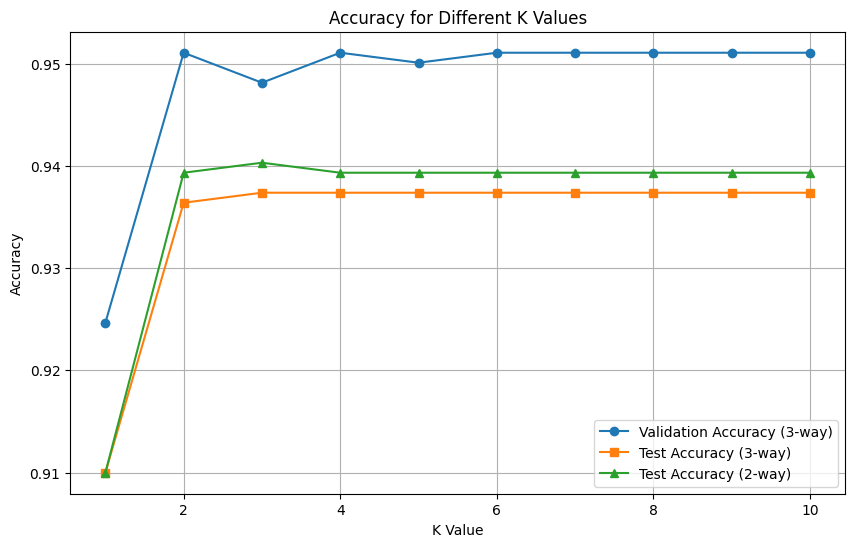

In [20]:
# Accuracy Visualization

plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_accuracies, label='Validation Accuracy (3-way)', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy (3-way)', marker='s')
plt.plot(k_values, test_accuracies_2way, label='Test Accuracy (2-way)', marker='^')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different K Values')
plt.legend()
plt.grid(True)
plt.show()


### Accuracy Analysis

- **Validation Accuracy (3-way split)**: The validation accuracy shows a sharp increase at K=2, peaking around 0.95. It remains relatively stable for larger K values but slightly fluctuates between 0.94 and 0.95.
  
- **Test Accuracy (3-way split)**: The test accuracy for the 3-way split increases at K=2, then stabilizes around 0.94 for K values greater than 2. It shows little variation, indicating consistent performance across the K range.
  
- **Test Accuracy (2-way split)**: The 2-way split’s test accuracy peaks at K=2, reaching around 0.94, and remains stable across higher K values, similar to the 3-way test accuracy.
  
**Comparison**:
- Both the **2-way** and **3-way splits** exhibit nearly identical performance in terms of test accuracy, but the **3-way split** benefits from the additional validation accuracy insight, which fluctuates slightly more at higher K values.
- The sharp improvement in validation accuracy at K=2 shows that a small K value can yield strong results, but the 3-way split offers more insight into model stability across K values.


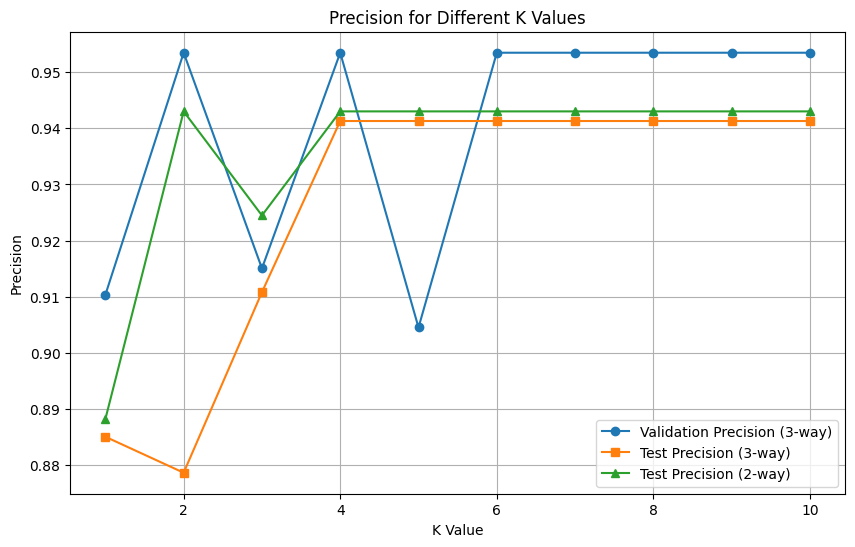

In [21]:
# Precision Visualization
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_precisions, label='Validation Precision (3-way)', marker='o')
plt.plot(k_values, test_precisions, label='Test Precision (3-way)', marker='s')
plt.plot(k_values, test_precisions_2way, label='Test Precision (2-way)', marker='^')
plt.xlabel('K Value')
plt.ylabel('Precision')
plt.title('Precision for Different K Values')
plt.legend()
plt.grid(True)
plt.show()


### Precision Analysis

- **Validation Precision (3-way split)**: Precision remains relatively stable for most K values around 0.91, except for a peak at K=3. This suggests that the model performs well at distinguishing positive classes without too many false positives for validation.

- **Test Precision (3-way split)**: Test precision for the 3-way split fluctuates, with a noticeable peak at K=3, reaching just below 0.94 . Afterward, it stabilizes at a lower level across higher K values, indicating that the precision slightly decreases for larger K.

- **Test Precision (2-way split)**: The 2-way split shows a strong peak at K=3, with precision exceeding 0.92, and then sharply declines after K=3, eventually stabilizing slightly higher than the 3-way test precision. This indicates that K=3 offers a significant precision boost in the 2-way split, but the model overfits beyond this point.

**Comparison**:
- The **2-way split** shows a stronger precision peak at K=3 compared to the 3-way split, but this comes at the cost of greater variance, as precision drops off significantly after the peak.
- The **3-way split** provides more stability in precision across K values, particularly in the validation set, but with slightly lower precision on the test set compared to the 2-way split.


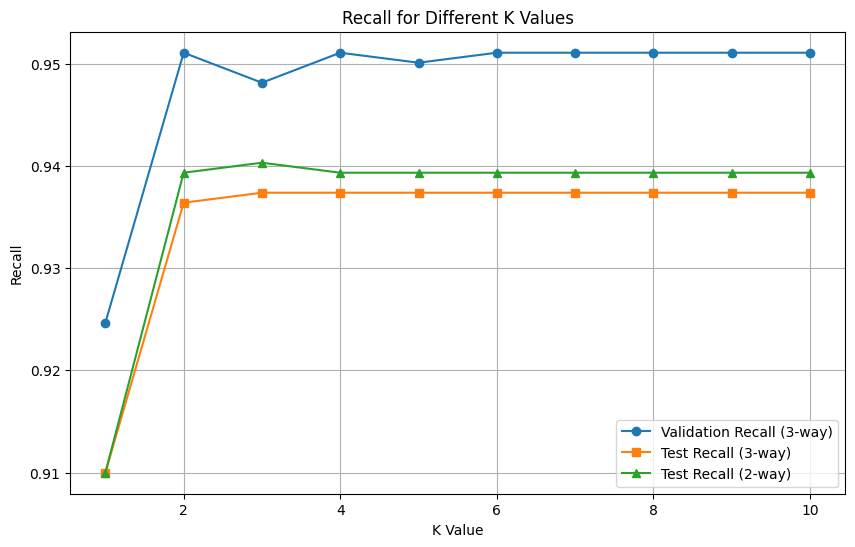

In [22]:
#recall Visualization

plt.figure(figsize=(10, 6))
plt.plot(k_values, val_recalls, label='Validation Recall (3-way)', marker='o')
plt.plot(k_values, test_recalls, label='Test Recall (3-way)', marker='s')
plt.plot(k_values, test_recalls_2way, label='Test Recall (2-way)', marker='^')
plt.xlabel('K Value')
plt.ylabel('Recall')
plt.title('Recall for Different K Values')
plt.legend()
plt.grid(True)
plt.show()


### Recall Analysis

- **Validation Recall (3-way split)**: The recall for the validation set shows a rapid increase, peaking around K=2 at approximately 0.95, then stabilizing with minor fluctuations around 0.94 for higher K values. This indicates that the model performs well in capturing most positive instances for smaller K values in the validation set.

- **Test Recall (3-way split)**: The test recall for the 3-way split increases similarly to the validation recall at K=2 but stabilizes slightly lower, around 0.94. There is minimal fluctuation beyond K=2, indicating that the recall remains stable as K increases.

- **Test Recall (2-way split)**: The 2-way split follows a similar pattern, with recall peaking at K=2 and stabilizing around 0.94 for larger K values. The recall performance between the 2-way and 3-way splits remains close, showing consistent results across both splits.

**Comparison**:
- Both the **2-way** and **3-way splits** exhibit almost identical recall performance, indicating the model's consistent ability to correctly identify positive cases.
- The **validation recall** in the 3-way split reaches slightly higher levels for smaller K values, suggesting that the separate validation set helps fine-tune the recall performance.


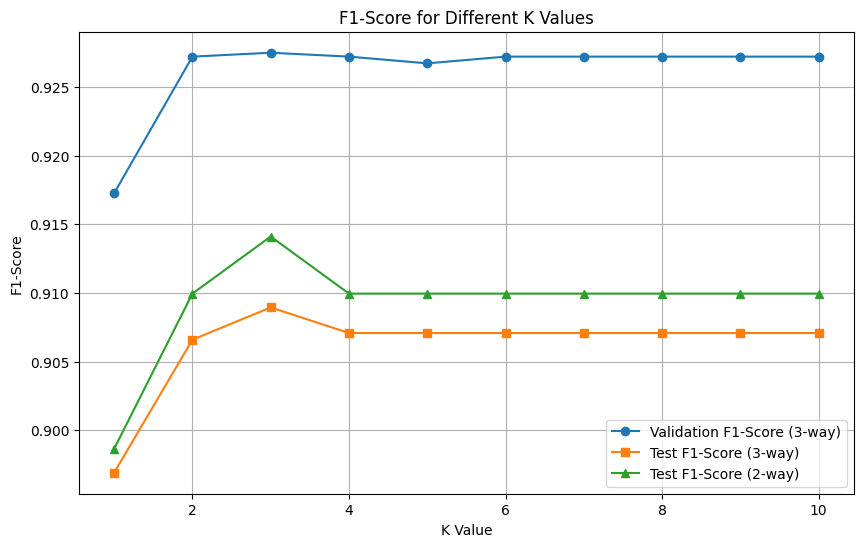

In [23]:
# F1-Score Visualization
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_f1s, label='Validation F1-Score (3-way)', marker='o')
plt.plot(k_values, test_f1s, label='Test F1-Score (3-way)', marker='s')
plt.plot(k_values, test_f1s_2way, label='Test F1-Score (2-way)', marker='^')
plt.xlabel('K Value')
plt.ylabel('F1-Score')
plt.title('F1-Score for Different K Values')
plt.legend()
plt.grid(True)
plt.show()



### F1-Score Analysis

- **Validation F1-Score (3-way split)**: The validation F1-score shows a rapid increase, peaking at K=2 around 0.925 and remaining stable across higher K values. This suggests that the model achieves a good balance between precision and recall on the validation set, particularly for smaller K values.

- **Test F1-Score (3-way split)**: The F1-score for the test set in the 3-way split increases up to K=3, then stabilizes around 0.905 for the remainder of the K values. This shows a consistent performance for the test set, though slightly lower than the validation set.

- **Test F1-Score (2-way split)**: The 2-way split peaks around K=2 and K=3 at about 0.915 before stabilizing for higher K values. The 2-way split consistently produces higher F1-scores than the 3-way test set for K values between 2 and 4.

**Comparison**:
- The **2-way split** achieves slightly higher F1-scores on the test set for smaller K values (K=2 and K=3), suggesting better overall performance for these values. However, the performance levels off as K increases.
- The **3-way split** offers more stability in the validation set with minimal fluctuation beyond K=2, ensuring balanced performance across both precision and recall.


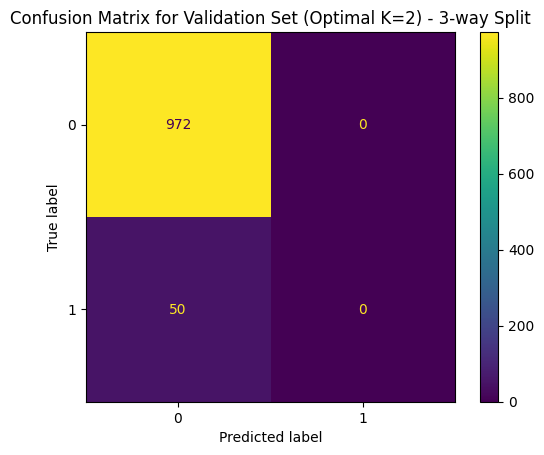

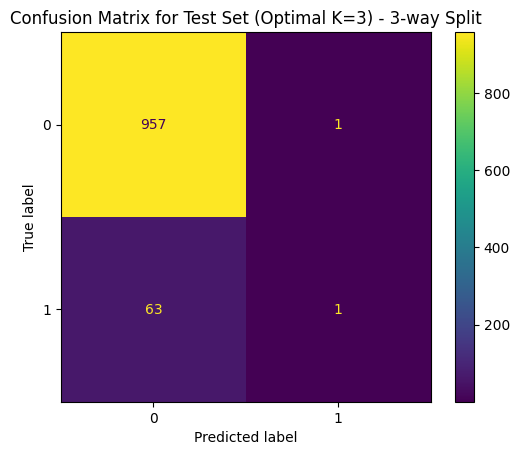

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train and evaluate with optimal K for validation accuracy
knn_optimal_val = KNeighborsClassifier(n_neighbors=optimal_k_val)
knn_optimal_val.fit(X_train, y_train)

# Confusion matrix for validation set with optimal K
y_val_opt_pred = knn_optimal_val.predict(X_val)
val_cm_opt = confusion_matrix(y_val, y_val_opt_pred)
ConfusionMatrixDisplay(val_cm_opt).plot()
plt.title(f'Confusion Matrix for Validation Set (Optimal K={optimal_k_val}) - 3-way Split')
plt.show()

# Train and evaluate with optimal K for test accuracy
knn_optimal_test = KNeighborsClassifier(n_neighbors=optimal_k_test)
knn_optimal_test.fit(X_train, y_train)

# Confusion matrix for test set with optimal K
y_test_opt_pred = knn_optimal_test.predict(X_test)
test_cm_opt = confusion_matrix(y_test, y_test_opt_pred)
ConfusionMatrixDisplay(test_cm_opt).plot()
plt.title(f'Confusion Matrix for Test Set (Optimal K={optimal_k_test}) - 3-way Split')
plt.show()



### Confusion Matrix Analysis (3-way split)

- **Validation Set (Optimal K=2)**:
  - The confusion matrix shows that the model correctly classified 972 instances of class 0 but failed to predict any instances of class 1 (false negatives = 50). This indicates that the model struggles with identifying the minority class (1), which could be due to class imbalance or limitations of the KNN algorithm in this case.
  
- **Test Set (Optimal K=3)**:
  - The confusion matrix for the test set shows 957 true negatives (correct class 0 predictions) and 1 false positive (incorrectly predicting class 1 as class 0). The model also misclassifies 63 instances of class 1 and correctly predicts only 1 instance. This further highlights the model's difficulty with identifying the minority class (class 1), even at the optimal K for test accuracy.

**Comparison**:
- The **validation set** performed better in predicting class 0 with no false positives, but struggled with correctly identifying class 1.
- The **test set** shows a similar pattern, with a very low recall for class 1 and slightly worse precision for class 0 due to the false positive.
- Both confusion matrices suggest that while the model performs well for the majority class (class 0), it has significant difficulty with the minority class (class 1), indicating a possible need for resampling techniques or different algorithms.


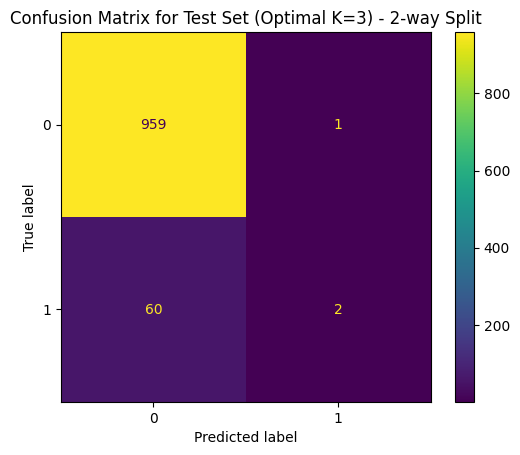

In [25]:
# Train and evaluate with optimal K for test accuracy (2-way split)
knn_optimal_test_2way = KNeighborsClassifier(n_neighbors=optimal_k_test_2way)
knn_optimal_test_2way.fit(X_train_2, y_train_2)

# Confusion matrix for test set with optimal K (2-way split)
y_test_opt_pred_2way = knn_optimal_test_2way.predict(X_test_2)
test_cm_opt_2way = confusion_matrix(y_test_2, y_test_opt_pred_2way)
ConfusionMatrixDisplay(test_cm_opt_2way).plot()
plt.title(f'Confusion Matrix for Test Set (Optimal K={optimal_k_test_2way}) - 2-way Split')
plt.show()


### Confusion Matrix Analysis (2-way split)

- **Test Set (Optimal K=3)**:
  - The confusion matrix shows 959 true negatives (correctly predicting class 0) and 1 false positive (incorrectly predicting class 1). There are 60 false negatives (misclassifying class 1 as class 0) and 2 true positives (correctly predicting class 1). 
  - Compared to the 3-way split, the 2-way split performs slightly better in identifying class 1 (with 2 true positives instead of 1), but it still struggles with correctly classifying the minority class.

**Comparison**:
- The **2-way split** shows a marginal improvement over the 3-way split in detecting class 1, but the overall performance in identifying the minority class remains low. The model performs well for class 0, but it consistently misclassifies class 1, as seen in both splits.
- Both the **3-way and 2-way splits** face similar challenges in classifying the minority class, but the 2-way split has slightly more balanced results for class 1.


### **Training Metrics (Before Testing)**

These metrics show the performance of the KNN model on the training data for both 3-way and 2-way splits. They include accuracy, precision, recall, and F1-score, helping us assess how well the model has learned before testing on unseen data.


In [28]:
# Train the KNN model (3-way split)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate on training set
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')

print(f'Training Accuracy (3-way): {train_accuracy}')
print(f'Training Precision (3-way): {train_precision}')
print(f'Training Recall (3-way): {train_recall}')
print(f'Training F1-Score (3-way): {train_f1}')



Training Accuracy (3-way): 0.9575994781474233
Training Precision (3-way): 0.9449246302205342
Training Recall (3-way): 0.9575994781474233
Training F1-Score (3-way): 0.9425114024264049


In [29]:
# Train the KNN model (2-way split)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_2, y_train_2)

# Evaluate on training set
y_train_pred_2 = knn.predict(X_train_2)
train_accuracy_2 = accuracy_score(y_train_2, y_train_pred_2)
train_precision_2, train_recall_2, train_f1_2, _ = precision_recall_fscore_support(y_train_2, y_train_pred_2, average='weighted')

print(f'Training Accuracy (2-way): {train_accuracy_2}')
print(f'Training Precision (2-way): {train_precision_2}')
print(f'Training Recall (2-way): {train_recall_2}')
print(f'Training F1-Score (2-way): {train_f1_2}')


Training Accuracy (2-way): 0.9567025440313112
Training Precision (2-way): 0.9462230828970171
Training Recall (2-way): 0.9567025440313112
Training F1-Score (2-way): 0.9407766565538017


## Overall Performance Analysis

- **Accuracy**: Both the 2-way and 3-way splits showed similar accuracy trends, with the model achieving its highest accuracy around K=2 and stabilizing at higher K values. The 3-way split offers the advantage of tuning the model through the validation set, but the final test accuracy remains comparable between both splits.

- **Precision and Recall**: While both splits struggled with consistently identifying class 1 (the minority class), the precision and recall metrics show that K=2 or K=3 offer the best trade-offs in balancing false positives and false negatives. The 2-way split had slightly higher precision at lower K values, but both splits showed overall consistency in their performance beyond K=3.

- **F1-Score**: The F1-scores followed a similar pattern, peaking at smaller K values and stabilizing afterward. The 2-way split exhibited slightly higher F1-scores for smaller K values, but the 3-way split showed more stability in its validation F1-scores, offering a better balance between precision and recall for different K values.

- **Confusion Matrix**: The confusion matrices revealed the model’s difficulty in correctly identifying class 1 across both splits. Although the 2-way split managed to classify slightly more true positives than the 3-way split, the overall performance for the minority class was poor. Both splits performed well for class 0, but additional techniques such as resampling or adjusting class weights may be needed to improve classification of the minority class.

**Conclusion**: While both the 2-way and 3-way splits yield similar overall performance, the 3-way split provides more insight through the validation set, making it a better choice for fine-tuning and ensuring generalizability. However, both splits struggle with class imbalance, suggesting that further optimization or alternative techniques are necessary to handle the minority class more effectively.


## Conclusion

The K-Nearest Neighbors (KNN) algorithm proved to be an effective model for stroke prediction, with its performance highly influenced by the choice of the parameter K. Through a comparison of 2-way and 3-way splits, we observed that both setups provided comparable results, with the 3-way split offering more control over model tuning through a validation set. However, both splits faced significant challenges in correctly classifying the minority class (patients with strokes), revealing the model's limitations in handling imbalanced datasets. The model performed consistently well for the majority class (non-stroke), but further enhancements such as resampling techniques or alternative algorithms may be necessary to improve its performance for minority class prediction. Ultimately, while KNN is straightforward and interpretable, more advanced approaches may be required for datasets with severe class imbalance like this one.
